In [126]:
import pandas as pd
import zipfile
import seaborn as sns

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [74]:
#Unzip the data folder in this repo, opens the googleplaystore.csv to a dataframe and previews it
zf = zipfile.ZipFile("data/google-play-store-apps.zip") 
google_play_df = pd.read_csv(zf.open('googleplaystore.csv'))
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
#Opens as dataframe and previews "googleplaystore_user_reviews.csv"
google_play_reviews_df = pd.read_csv(zf.open("googleplaystore_user_reviews.csv"))
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [21]:
#Locates a row with a bad category that was throwing off the calculations
#commented code is code that I looked at previously, but doesn't need to be run now

#google_play_df['Category'].value_counts()
google_play_df.loc[google_play_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [32]:
#Creates and stores a list of categories and how many entries are in each category
gp_df_vc = google_play_df.drop(10472)['Category'].value_counts()

In [46]:
#Shows results of previous cell
gp_df_vc

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [35]:
#creates a grouped dataframe, grouped by category, and summarizing the resulting data by the mean
#drop removes the bad data line
rate_group = google_play_df.drop(10472).groupby('Category').mean()

#Sorts the grouped datagrame by the mean rating for the category, highest first
rate_group = rate_group.sort_values(by='Rating',ascending=False)

#Adds a count of the number of apps in each category
rate_group['count'] = rate_group.index.map(lambda x: gp_df_vc[x])
rate_group.head()

,Rating,count
Category,,
EVENTS,4.435556,64
EDUCATION,4.389032,156
ART_AND_DESIGN,4.358065,65
BOOKS_AND_REFERENCE,4.346067,231
PERSONALIZATION,4.335987,392


# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

In [37]:
#Finds the correlation coefficient of the rating and count data (still grouped by category)
#Value of -0.1 means there is little to no correlation.
rate_group.corr()

,Rating,count
Rating,1.000000,-0.100209
count,-0.100209,1.000000


In [132]:
sns.set_context('talk')

Text(0.5, 1.0, 'Rating vs Count of entries per category')

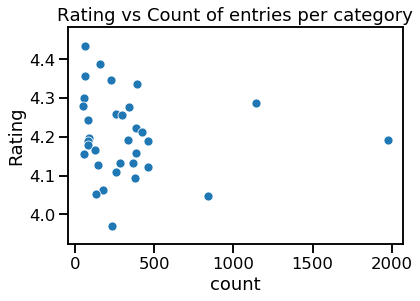

In [133]:
#Creates a scatter plot
#x-axis is count, y-axis is mean rating
#rate_group.plot.scatter('count','Rating',figsize=(16,10))
sns.scatterplot(rate_group['count'],rate_group['Rating']).set_title('Rating vs Count of entries per category')

Text(0.5, 1.0, 'Rating vs Size, zoomed in')

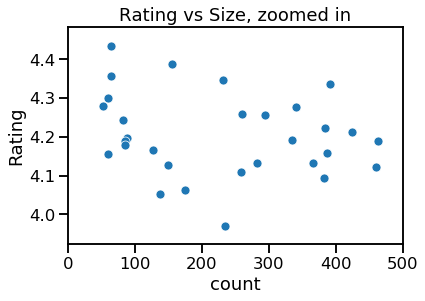

In [150]:
#same data as above, but with a maximum x-axis of 600, to zoom in on non-outlier data
#To see if there's a pattern there. Not really
#rate_group.plot.scatter('count','Rating',figsize=(16,10)).set_xlim(0,600)
ax = sns.scatterplot(rate_group['count'],rate_group['Rating']).set_title('Rating vs Size, zoomed in')
ax1 = ax.axes
ax1.set(xlim=(0, 500))
ax

# For this next section, choose a Category of playstore apps

## Category Chosen: [Communication]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

In [58]:
#Was used to check if there were a significant number of NaNs in any one category of data
#Commented out just so it took up less space

#temp = google_play_df.loc[google_play_df['Rating'].isna()]
#temp['Category'].value_counts()

In [59]:
#Used to preview a list of genres for each category, many categories have only one genre
#which didn't seem worth data crunching for. Currently only compares GAME and EDUCATION
#the for cat in [list] can be replaced with [gp_df_vc.index] to see all at once
#Treated as a text block because it got really long without presenting final data

"""
for cat in ['GAME','EDUCATION']:
    print(cat.title(),gp_df_vc[cat],'\n')
    temp = google_play_df[google_play_df['Category'] == cat]
    print(temp['Genres'].value_counts(),'\n\n')
    """

"\nfor cat in ['GAME','EDUCATION']:\n    print(cat.title(),gp_df_vc[cat],'\n')\n    temp = google_play_df[google_play_df['Category'] == cat]\n    print(temp['Genres'].value_counts(),'\n\n')\n    "

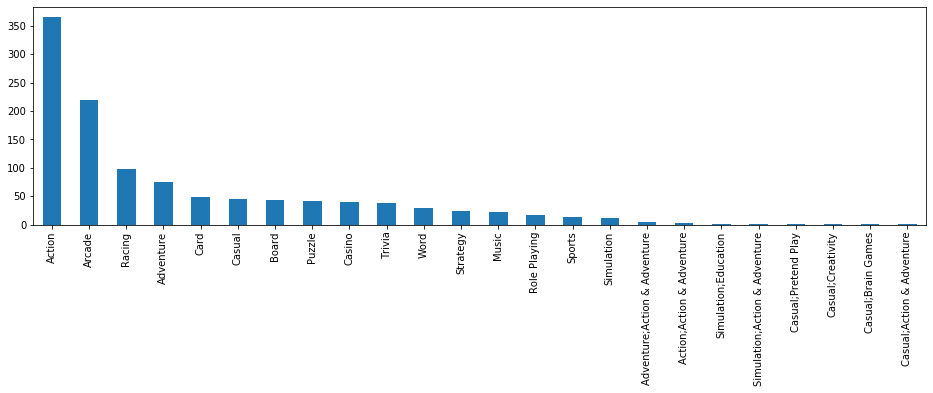

In [64]:
#creates game dataframe, consisting of only entries with category GAME
#The creates a bar graph using the value counts of genres

game = google_play_df[google_play_df['Category'] == 'GAME']
game['Genres'].value_counts().plot(kind='bar',figsize=(16,4))

In [70]:
#First line creates a new column for the game dataframe, which simplifies genre
#So Adventure;Action & Adventure gets sorted as only the first part, Adventure
#Since most of these genres have only a few entries, and fit into a larger one
#Second line shows that there are no remaing complex genres
#Commented out to skip repeating the calculation everytime I wanted to check

#game['Genres_simple'] = game['Genres'].map(lambda x:x.split(';')[0])
game['Genres_simple'].value_counts()

Action          368
Arcade          220
Racing           98
Adventure        80
Casual           49
Card             48
Board            44
Puzzle           42
Casino           39
Trivia           38
Word             29
Strategy         24
Music            22
Role Playing     16
Sports           14
Simulation       13
Name: Genres_simple, dtype: int64

[Text(0, 0, 'Action'),
 Text(0, 0, 'Arcade'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Casual'),
 Text(0, 0, 'Card'),
 Text(0, 0, 'Board'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Casino'),
 Text(0, 0, 'Trivia'),
 Text(0, 0, 'Word'),
 Text(0, 0, 'Strategy'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Role Playing'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Simulation')]

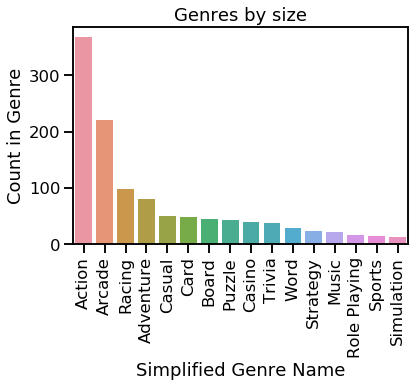

In [166]:
#Similar bar plot as before, but with the simplified genres

#game['Genres_simple'].value_counts().plot(kind='bar',figsize=(16,4))
data=game['Genres_simple'].value_counts()


ax = sns.barplot(x=data.index,y=data)
ax.set(ylabel= 'Count in Genre',xlabel= 'Simplified Genre Name',title = 'Genres by size')
ax.set_xticklabels(data.index,rotation=90)

# Question 4:
What is something interesting you found about your category? 

In [73]:
#Still in progress, this is just previewing data to see what types tye data is in
#General values, etc, just to see what to start looking for
game.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Genres_simple
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,Adventure
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,Arcade
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,Casual
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up,Card
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up,Casual


# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

In [117]:
#Oh this mess, whoops. Commented out code is to prevent running complex calculations over and over
#To run for yourself uncomment each line
#Final line used to preview, summing each column, which is now treated as numeric and thus
#Can have calculations run on it



#df = google_play_df.drop(10472)
#df['Reviews'] = df['Reviews'].astype(int)
#df['Price'] = df['Price'].map(lambda x:x.replace("$",''))
#df['Price'] = df['Price'].astype(float)
#df['Installs'] = df['Installs'].map(lambda x:x.translate({ord('+'):None,ord(','):None}))
#df['Installs'] = df['Installs'].astype(int)
#df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.groupby('Category').sum().sort_values(by='Installs',ascending=False)

,Rating,Reviews,Installs,Price
Category,,,,
GAME,4702.1,1.585422e+09,3.508602e+10,287.30
COMMUNICATION,1364.0,8.154623e+08,3.264728e+10,83.14
PRODUCTIVITY,1478.2,1.141170e+08,1.417609e+10,250.93
SOCIAL,1102.2,6.212414e+08,1.406987e+10,15.97
TOOLS,2970.8,2.731850e+08,1.145277e+10,267.25
FAMILY,7323.9,4.102263e+08,1.025826e+10,2434.78
PHOTOGRAPHY,1328.9,2.135166e+08,1.008825e+10,134.21
NEWS_AND_MAGAZINES,962.8,5.440086e+07,7.496318e+09,3.98
TRAVEL_AND_LOCAL,928.7,6.261792e+07,6.868887e+09,49.95


In [120]:
#previews numeric version of dataframe
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [125]:
#ignore, I'm still trying to get this to work right

for cat in gp_df_vc.index:
    print(cat.title(),gp_df_vc[cat],'\n')
    temp = df[df['Category'] == cat]
    print(temp['Reviews'].mean(),'\n\n')

Family 1972 

208025.5223123732 


Game 1144 

1385858.6966783216 


Tools 843 

324062.9228944247 


Medical 463 

3425.4319654427645 


Business 460 

30335.982608695653 


Productivity 424 

269143.80896226416 


Personalization 392 

227923.82653061225 


Communication 387 

2107137.622739018 


Sports 384 

184453.56510416666 


Lifestyle 382 

33724.56544502618 


Finance 366 

47952.8087431694 


Health_And_Fitness 341 

111125.34604105572 


Photography 335 

637363.1343283582 


Social 295 

2105903.125423729 


News_And_Magazines 283 

192229.19787985866 


Shopping 260 

442466.23846153845 


Travel_And_Local 258 

242705.11240310076 


Dating 234 

31159.30769230769 


Books_And_Reference 231 

95060.90476190476 


Video_Players 175 

630743.9314285715 


Education 156 

253819.14102564103 


Entertainment 149 

397168.8187919463 


Maps_And_Navigation 137 

223790.17518248176 


Food_And_Drink 127 

69947.48031496063 


House_And_Home 88 

45186.193181818184 


Auto_And_Ve

# Question 6:
Anything else we should know about this dataset?

In [171]:
#Erica's code:
#Data Cleaning Code:#Shows all unique values to discover the placeholder data
google_play_df['Rating'] = google_play_df['Rating'].fillna(google_play_df['Rating'].median()) #fills the 1474 NaNs in rating with the median
google_play_df.isna().sum() #Final check for NaNs = 0google_play_df['Type'] = google_play_df['Type'].fillna(google_play_df['Type'].mode()) 


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [172]:
#Replaces the NaN in Type with the Mode
google_play_df['Current Ver'] = google_play_df['Current Ver'].fillna(google_play_df['Current Ver'].mode()) 
#Replaces the NaN in Current Ver with the Mode
google_play_df['Android Ver'] = google_play_df['Android Ver'].fillna(google_play_df['Android Ver'].mode()) 
#Replaces the NaN in Android Ver with the Mode4-6 Games:
games = google_play_df.loc[google_play_df['Category'] == 'GAME'] #Accesses the Games category
#games.groupby(['Rating']).apply(lambda x: sorted(x))
games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [175]:
rating_vs_droid = games.groupby(['Android Ver', 'Last Updated']).mean() 
games['Last Updated'] = pd.to_datetime(games['Last Updated']) 
#Converts date fron datatype string to date
games['Last App Update By Year'] = games['Last Updated'].dt.year 
#extracts the yearprint(rating_vs_droid.sort_values(by= ['Rating', 'Last App Update By Year' ], ascending=False)) 


D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [184]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Rating vs Year of most recent update')

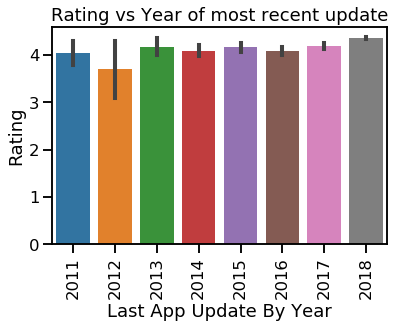

In [186]:
#sorts dataframe by the review and year of app update 
ax = sns.barplot(x='Last App Update By Year', y='Rating', data=games)
#Barplot of Last App Update By Year vs. App Rating
#sns.distplot(rating_vs_droid['Rating']) 
#Shows the distribution across app ratings
plt.xticks(rotation=90)
ax.set_title('Rating vs Year of most recent update')